<h1 style='color: blue;'> Text preprocessing (Các kỹ thuật xử lý và làm sạch text) </h1>

<h1>TOKENIZER</h1>

<p><b>Tokenizer</b> là một trong những thành phần cốt lõi của pipeline NLP. Chúng phục vụ một mục đích: dịch văn bản thành dữ liệu có thể được xử lý bởi mô hình. Mô hình chỉ có thể xử lý dạng số, do đó, các tokenizer cần phải chuyển đổi đầu vào văn bản của chúng ta thành dữ liệu số. </p>

<span>Pipeline: Quy trình phát triển</span>

<h3>1. Thuật toán Tokenizer "Word-based"</h3>
<h4>-Thuật toán này sẽ tách đoạn text cho trước thành các phần nhỏ hơn, nó dự vào khoảng cách dựa các từ để tách</h4>

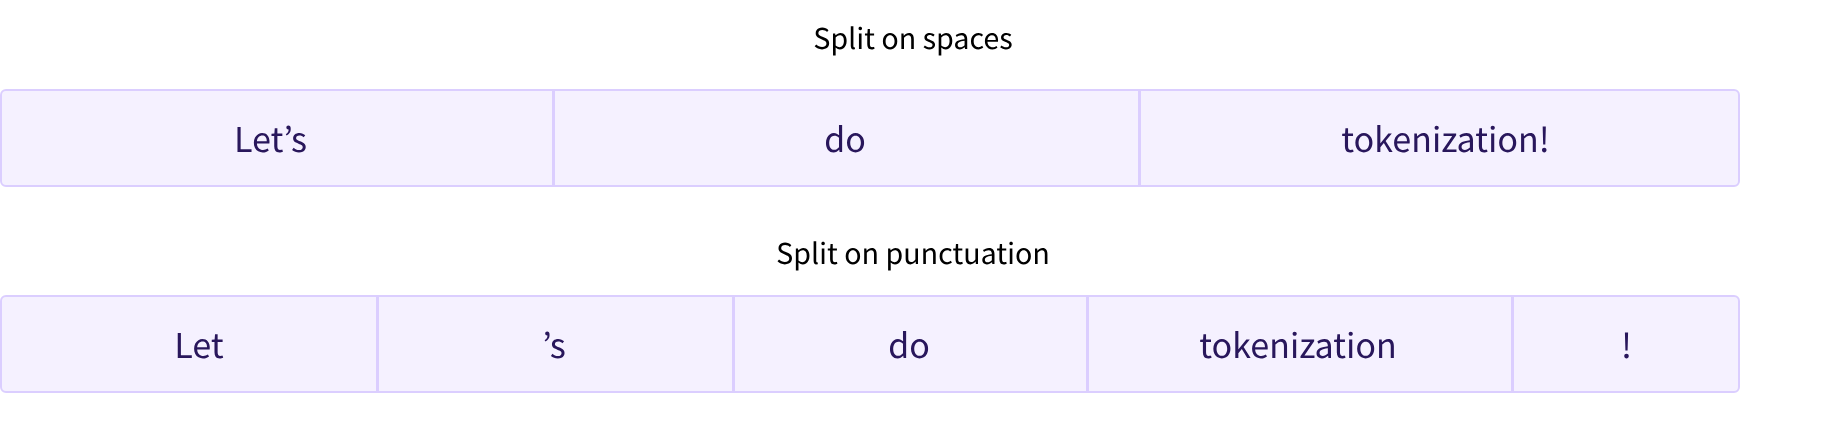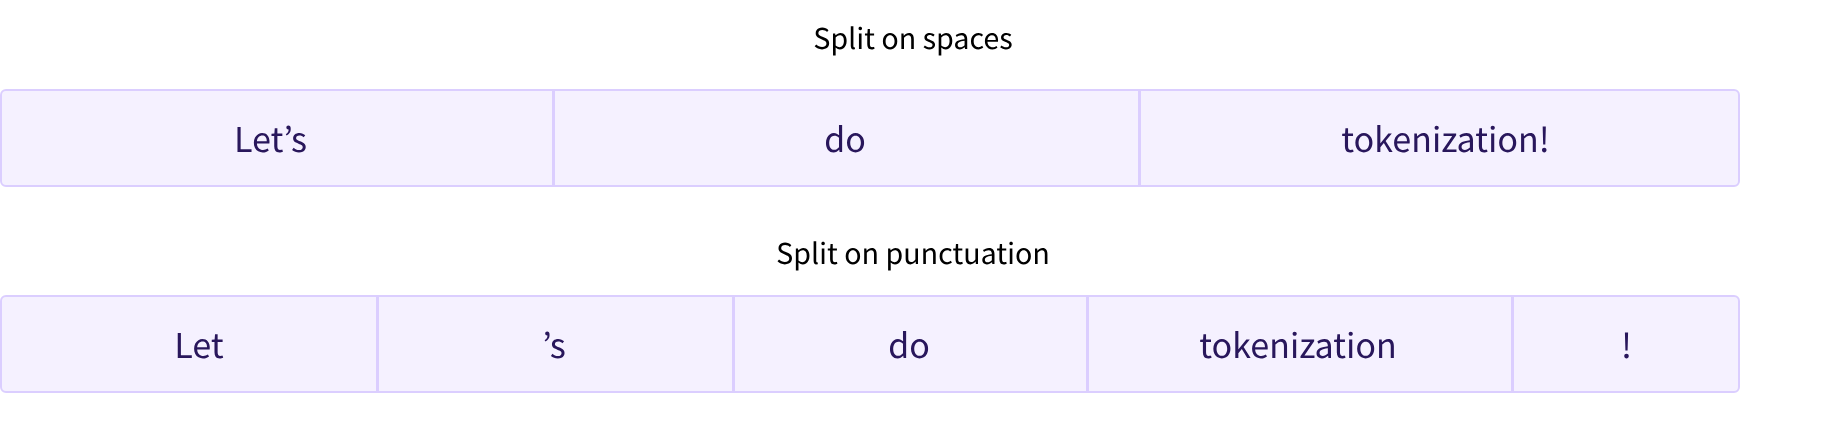

<b>Ví dụ:</b> Hãy dùng thuật toán "Word-based tokenizer" để xử lý đoạn text sau:"Xin chao Sudo code 2024".

In [1]:
text = "Xin chao Sudo code 2024"
after = text.split()
print(after)


['Xin', 'chao', 'Sudo', 'code', '2024']


Nếu chúng ta muốn bao phủ hoàn toàn một ngôn ngữ bằng tokenize mức từ, chúng ta sẽ cần phải có một chỉ số nhận dạng cho mỗi từ trong ngôn ngữ, điều này sẽ tạo ra một lượng lớn token. Ví dụ: có hơn 500,000 từ trong tiếng Anh, vì vậy để xây dựng bản đồ nối mỗi từ đến một ID đầu vào, chúng ta cần theo dõi ngần đó ID. Hơn nữa, các từ như “dog” được biểu diễn khác với các từ như “dogs”, và ban đầu mô hình sẽ không có cách nào để biết rằng “dog” (chó) và “dogs” là tương tự nhau: nó sẽ xác định hai từ này không liên quan. Điều này cũng áp dụng cho các từ tương tự khác, như “run” (chạy) và “running”, mà ban đầu mô hình sẽ không thấy là tương tự.

Cuối cùng, chúng ta cần một token tùy chỉnh để đại diện cho các từ không có trong vốn từ vựng của chúng ta. Mã này được gọi là token “không xác định”, thường được biểu thị là <b>”[UNK]”</b> hoặc "<unk>". Nói chung, đó là một dấu hiệu xấu nếu bạn thấy trình tokenize đang tạo ra rất nhiều token này, vì nó không thể truy xuất một biểu hiện hợp lý của một từ và bạn đang mất thông tin trong suốt quá trình. Mục tiêu khi tạo từ vựng là làm sao cho trình tokenize mã hóa càng ít từ thành token không xác định càng tốt.

<h3>2. Thuật toán Tokenizers "Character-based"</h3>

Thuật toán này tách data thành từng kí tự riêng biệt.

<img src="https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter2/character_based_tokenization.svg">

In [2]:
text = "let's do tokenization!"
after = list(text)
print(after)


['l', 'e', 't', "'", 's', ' ', 'd', 'o', ' ', 't', 'o', 'k', 'e', 'n', 'i', 'z', 'a', 't', 'i', 'o', 'n', '!']


Cách tiếp cận này cũng không hoàn hảo. Vì biểu diễn bây giờ dựa trên các ký tự chứ không phải từ, người ta có thể lập luận rằng, theo trực giác, nó ít ý nghĩa hơn: mỗi ký tự không có nhiều ý nghĩa riêng so với trường hợp của các từ. Tuy nhiên, điều này lại khác nhau tùy theo ngôn ngữ; trong tiếng Trung, chẳng hạn, mỗi ký tự mang nhiều thông tin hơn một ký tự trong ngôn ngữ Latinh.

Để tận dụng tối đa cả hai, chúng ta có thể sử dụng kỹ thuật thứ ba kết hợp hai cách tiếp cận: tokenize theo từ phụ.


<h3>3. Thuật toán Tokenizers "Subword-based"</h3>

Các thuật toán token theo từ phụ dựa trên nguyên tắc rằng các từ được sử dụng thường xuyên không được chia thành các từ phụ nhỏ hơn, nhưng các từ hiếm phải được phân tách thành các từ phụ có ý nghĩa.

Ví dụ: "let's do tokenization"
<img src="https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter2/bpe_subword.svg">

Một số kỹ thuật khác:

    + Byte-level BPE (BPE cấp byte), như được sử dụng trong GPT-2
    + WordPiece, như được sử dụng trong BERT
    + SentencePiece hoặc Unigram, như được sử dụng trong một số mô hình đa ngôn ngữ

<h3>4. Ứng dụng và code thực tế !</h3>

BERT là viết tắt của Bidirectional Encoder Representations from Transformers được hiểu là một mô hình học sẵn hay còn gọi là pre-train model, học ra các vector đại diện theo ngữ cảnh 2 chiều của từ, được sử dụng để transfer sang các bài toán khác trong lĩnh vực xử lý ngôn ngữ tự nhiên.

Step to tokenizer.

<img src="img/step.png">

<h4>Step 1: <b>Raw text</b> to <b>Tokens</b></h4>

** Tokenizer theo Subword-based

In [3]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokens = tokenizer.tokenize("Phai tach dong cac ki tu nay thanh kieu subword!")

print(tokens)

['Ph', '##ai', 'ta', '##ch', 'dong', 'ca', '##c', 'k', '##i', 't', '##u', 'na', '##y', 'than', '##h', 'k', '##ieu', 'sub', '##word', '!']


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


<h4>Step 2: <b>Token</b> to <b>Input id</b></h4>

In [4]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokens = tokenizer.tokenize("Phai tach dong cac ki tu nay thanh kieu subword!")

imput_ids = tokenizer.convert_tokens_to_ids(tokens)

print(imput_ids)

[7642, 3814, 27629, 1732, 26182, 11019, 1665, 180, 1182, 189, 1358, 9468, 1183, 1190, 1324, 180, 21114, 4841, 12565, 106]


<h4>Step 3: Thêm những ký tự đặc biệt còn thiếu.</h4>

In [5]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
tokens = tokenizer.tokenize("Phai tach dong cac ki tu nay thanh kieu subword!")

input_ids = tokenizer.convert_tokens_to_ids(tokens)

final_inp = tokenizer.prepare_for_model(input_ids)

print(final_inp["input_ids"])

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


[101, 6887, 4886, 11937, 2818, 11947, 6187, 2278, 11382, 10722, 29349, 2084, 2232, 11382, 13765, 4942, 18351, 999, 102]


Như vậy chung ta đã chuyển từ text đầu vào thành dạng mà chúng mình có thể xử lý được.

<h4><b>Cách làm nhanh hơn !</b></h4>

In [4]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
input = tokenizer("Phai tach dong cac ki tu nay thanh kieu subword!")
print(input)

{'input_ids': [101, 7642, 3814, 27629, 1732, 26182, 11019, 1665, 180, 1182, 189, 1358, 9468, 1183, 1190, 1324, 180, 21114, 4841, 12565, 106, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


<h4><b>Tokenizer các sentence Tiếng Việt</b></h4>

In [19]:
pip install sentencepiece

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\admin\appdata\roaming\python\python311\site-packages\upskillhp3-0.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [20]:
from transformers import AutoModel, AutoTokenizer

bartpho = AutoModel.from_pretrained("vinai/bartpho-syllable")

tokenizer = AutoTokenizer.from_pretrained("vinai/bartpho-syllable")

line = "Xin chào Sudo code 2024, tôi là Nguyễn Văn Mạnh"

input_ids = tokenizer(line, return_tensors="pt")

final_inp = tokenizer.prepare_for_model(input_ids)

print(final_inp["input_ids"])



ImportError: 
BartphoTokenizer requires the SentencePiece library but it was not found in your environment. Checkout the instructions on the
installation page of its repo: https://github.com/google/sentencepiece#installation and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.
